# **Average gene expression and chromatin accessibility**

## **Introduction**

The `average` function is designed to return a *Pandas.DataFrame* that represents *gene expression* or c*hromatin accessibility* across various cell types for selected features. This tutorial demonstrates several possible applications of the `average` function.

## **Prerequisite**

In [37]:
import atlasapprox

api = atlasapprox.API()

For detailed initial setup instructions, refer to the [Quick Start Tutorial](link to quick_start).

## **Example 1: Obtaining average gene expression and chromatin accessibility**

**1.1** This example demonstrates a straightforward use of the `average` function. The `average` function lets you retrieve the average gene expression data for selected genes within an organism's specific organ.

The following example shows how to examine the average expression of five genes (*COL13A1*, *COL14A1*, *TGFBI*, *PDGFRA*, *GZMA*) in the human lung:

In [59]:
avg_gene_expr_lung = api.average(
    organism = "h_sapiens", 
    organ = "lung", 
    features = ["COL13A1", "COL14A1", "TGFBI", "PDGFRA", "GZMA"], 
    # measurement_type = 'gene_expression'
)

# Display the result
display(avg_gene_expr_lung)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806


### **Output**

The `avg_gene_expr_lung` variable contains a Pandas DataFrame where:
* Each row represents a gene.
* Each column corresponds to a cell type.
* The values indicate the average gene expression, measured in counts per ten thousand (cptt).

**1.2** The `average` function takes *gene_expression* as the default measurement type but can also get *chromatin accessibility* of cells in organs of *h_sapiens*.

The following example shows how to examine the average chromatin accessibility of two genomic regions (*chr1:9955-10355*, *chr10:122199710-122200110*) in the human lung:

In [60]:
# Call API function with params
avg_chrom_access_lung = api.average(
    organism = "h_sapiens", 
    organ = "lung", 
    features = ['chr1:9955-10355', 'chr10:122199710-122200110'],    # set genomic regions as feature input
    measurement_type = 'chromatin_accessibility'        # change measurement_type to chromatin_accessibility
)

# Display the result
display(avg_chrom_access_lung)

,mast,macrophage,alveolar macrophage,B,plasma,T,NK,AT1,AT2,club,ciliated,capillary,lymphatic,fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,neuroendocrine
chr1:9955-10355,0.0,0.007900,0.018190,0.003077,0.017543,0.008494,0.014113,0.011353,0.010183,0.004265,0.000000,0.008808,0.040392,0.009133,0.0,0.0,0.008808,0.0,0.0
chr10:122199710-122200110,0.0,0.001852,0.003558,0.006129,0.000000,0.001337,0.000000,0.006590,0.006129,0.001437,0.005302,0.002567,0.000000,0.000776,0.0,0.0,0.004423,0.0,0.0


### **Output**
`avg_chrom_access_lung` returns a Pandas DataFrame where:
* Each row represents a genomic region.
* Each column corresponds to a cell type.
* The values indicate the average chromatin accessibility, expressed as a fraction of accessibility.

## **Example 2: Log transformation of gene expression data**

Logarithmic transformation is a widely used technique in bioinformatics and computational biology to enhance dynamic range and normalize data distribution. The following example demonstrates applying a logarithmic transformation to each cell type's average gene expression values in the `avg_gene_expr_lung` data frame.

In [76]:
import numpy as np

# Apply the logarithm (e.g., natural logarithm) to all cells in the DataFrame
# Filter all 0 input to avoid "devide by 0 runtime error"
log_avg_gene_expr_lung = avg_gene_expr_lung.map(lambda x: np.log(x) if x != 0 else "")

# Display the result
display(log_avg_gene_expr_lung)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,,-1.501198,,-7.249410,,,-6.116957,,-3.535399,,...,-5.537455,,,-5.275936,-0.805285,,-2.027668,-2.68884,,
COL14A1,,,-6.555747,-6.598998,,,-5.94964,,,,...,-4.889478,-3.62438,-2.819287,0.104429,0.203775,0.032843,0.745958,-3.393838,,
TGFBI,-2.731059,-2.197259,0.588932,0.225302,0.783962,,-2.47835,-2.297996,-1.118988,1.502482,...,-3.080590,-2.693996,-0.650251,-0.933461,-1.740724,-1.165125,-1.352811,-2.12855,-0.903927,-3.429023
PDGFRA,,,-6.943553,-6.026530,-5.753339,,,-5.291354,,,...,-4.471744,-5.836216,,0.572649,1.314818,-2.050781,-2.815888,,-1.101177,
GZMA,-4.309722,-1.946054,-1.74843,-3.529284,-3.889648,-3.684367,-2.75999,2.197898,2.979966,,...,-3.115621,-3.14664,-2.605353,-3.509257,-2.512862,-2.128287,,-0.776221,-3.101483,-2.833507


### **Output**
`log_avg_gene_expr_lung` returns a Pandas DataFrame with the following structure:
* Each row represents a gene.
* Each column corresponds to a cell type.
* The values represent the logarithmically transformed average gene expression, measured in counts per ten thousand (cptt).
* For cells with zero values in the original data, the logarithmic transformation results are replaced with an empty string to handle undefined logarithms.

## **Example 3: Sorting gene expression data by cell type**

This example shows how to sort `avg_gene_expr_lung` by the average gene expression in a specific cell type (neutrophils), in ascending order.

In [62]:
sorted_by_neutrophil = avg_gene_expr_lung.sort_values(by='neutrophil')

display(sorted_by_neutrophil)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419


### **Output**
`sorted_by_neutrophil` gives a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* The order of the rows is based on the average gene expression in neutrophil in ascending order.

Additionally, `sort_values()` can return the output in descending order by setting the ascending parameter to False:

In [63]:
des_sorted_by_neutrophil = avg_gene_expr_lung.sort_values(by='neutrophil', ascending=False)

display(des_sorted_by_neutrophil)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000


### **Output**
`des_sorted_by_neutrophil` gives a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* The order of the rows is based on the average gene expression in neutrophil in descending order.

## **Example 4: Sorting data by multiple cell types**

This example demonstrates how to sort `avg_gene_expr_lung` first by *neutrophils gene expression* and then by *basophils gene expression* in ascending order.

In [64]:
sorted_by_neutrophil_basophil = avg_gene_expr_lung.sort_values(by=['neutrophil', 'basophil'])

display(sorted_by_neutrophil_basophil)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419


### **Output**
`sorted_by_neutrophil_basophil` gives a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* The order of the rows is based on the average gene expression firstly by neutrophil gene expression then by basophil, in ascending order.


## **EExample 5: Filtering data by selected cell types**

This example demonstrates how to filter `avg_gene_expr_lung` to display only the selected cell types (*neutrophil*, *macrophage*, *plasma*).

In [65]:
# Filter your data with specific cell types
chosen_cell_type = ['neutrophil', 'macrophage', 'plasma']
filtered_cell_type_df = avg_gene_expr_lung[chosen_cell_type]

display(filtered_cell_type_df)

,neutrophil,macrophage,plasma
COL13A1,0.000000,0.000711,0.002205
COL14A1,0.000000,0.001362,0.002607
TGFBI,0.065150,1.252701,0.083882
PDGFRA,0.000000,0.002414,0.000000
GZMA,0.013437,0.029326,0.063292


### **Output**
`filtered_cell_type_df` gives a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* only selected cell types (*'neutrophil', 'macrophage', 'plasma'*) from the `avg_gene_expr_lung` are displayed.

## **Example 6: Filtering data by threshold expression value**

This example demonstrates how to filter `avg_gene_expr_lung` to display only values equal to or greater than 0.06.

In [66]:
# Create a threshold
threshold = 0.06

filtered_threshold_df = avg_gene_expr_lung[avg_gene_expr_lung > threshold]
filtered_threshold_df = filtered_threshold_df.fillna("") # Replace NaN with an empty string.

display(filtered_threshold_df)

,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,,0.222863,,,,,,,,,...,,,,,0.446961,,0.131642,0.06796,,
COL14A1,,,,,,,,,,,...,,,,1.110076,1.226022,1.033389,2.10846,,,
TGFBI,0.06515,0.111107,1.802062,1.252701,2.190132,,0.083882,0.10046,0.32661,4.492828,...,,0.06761,0.521915,0.393191,0.175393,0.311884,0.258512,0.11901,0.404976,
PDGFRA,,,,,,,,,,,...,,,,1.772957,3.724075,0.128634,,,0.332479,
GZMA,,0.142837,0.174047,,,,0.063292,9.006065,19.687157,,...,,,0.073877,,0.081036,0.119041,,0.460141,,


### **Output**
`filtered_threshold_df` gives a *Pandas DataFrame* where:
* Each row represents a gene.  
* Each column corresponds to a cell type.
* The values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* All values under 0.06 have been removed.

## **Example 7: Calculating Z-score for a gene in a specific cell type**

This example demonstrates calculating the Z-score of the COL13A1 gene's expression in neutrophils using the `avg_gene_expr_lung` DataFrame. The Z-score indicates how the expression of *COL13A1* in *neutrophils* deviates from the gene's overall mean expression across all cell types, expressed in standard deviations.

In [56]:
# define the cell type and gene
chosen_cell_type = 'neutrophil'
chosen_gene = 'COL13A1'
# get the chosen gene's average gene expression across all cell type
mean = avg_gene_expr_lung.loc[chosen_gene].mean()
# get the chosen gene's standard deviation across all cell type
std_dev = avg_gene_expr_lung.loc[chosen_gene].std()
# get the chosen gene's gene expression in specific cell type
gene_expression = avg_gene_expr_lung.loc[chosen_gene, chosen_cell_type]
# get the z-score
z_score = (gene_expression - mean)/std_dev

# display results
print(f"Mean gene expression of the  {chosen_gene}:", mean)
print(f"Standard deviation of the {chosen_gene}:", std_dev)
print(f"Z-score of {chosen_gene} average gene expression in {chosen_cell_type}:", z_score)

Mean gene expression of the  COL13A1: 0.03208803452823001
Standard deviation of the COL13A1: 0.09146214300946233
Z-score of COL13A1 average gene expression in neutrophil: -0.3508340551883887


### **Output**

* This output displays the mean gene expression of a chosen gene across all cell types.
* This output displays the standard deviation of a chosen gene across all cell types.
* This output displays the z-score of chosen gene's average gene expression in a chosen cell type.

## **Example 8: Analyzing gene expression across multiple organs**

This example calculates and displays the average expression of five genes (*COL13A1*, *COL14A1*, *TGFBI*, *PDGFRA*, *GZMA*) across three human organs: *lung*, *gut*, and *liver*.

In [36]:
organ_list = ["lung", "gut", "liver"]

# loop through organ_list and display the results
for item in organ_list:
    avg_gene_expr = api.average(
        organism = "h_sapiens", 
        organ = item, 
        features = ["COL13A1", "COL14A1", "TGFBI", "PDGFRA", "GZMA"], 
        measurement_type = 'gene_expression'
    )

    # Display the result
    print(f'Everage gene expression in human {item}:')
    display(avg_gene_expr)

Everage gene expression in human lung:


,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806


Everage gene expression in human gut:


,neutrophil,mast,monocyte,B,plasma,T,goblet,brush,crypt,transit amp,enterocyte,paneth,venous,lymphatic,fibroblast,enteroendocrine
COL13A1,0.014146,0.049564,0.000000,0.000000,0.007597,0.000415,0.003135,0.138984,0.009553,0.001848,0.002501,0.000000,0.0,0.000000,0.036372,0.000000
COL14A1,0.000000,0.000000,0.035564,0.000000,0.001895,0.000320,0.001404,0.000000,0.000000,0.001129,0.001227,0.002958,0.0,0.000000,1.486094,0.074912
TGFBI,3.150326,0.000000,0.000000,0.029953,0.003055,0.031463,0.017436,0.000000,0.000000,0.006506,0.007120,0.001341,0.0,0.167873,0.163474,0.000000
PDGFRA,0.000000,0.000000,0.000000,0.000000,0.000000,0.001268,0.003393,0.000000,0.000000,0.000000,0.003010,0.000000,0.0,0.000000,5.021291,0.006898
GZMA,0.100076,0.014693,0.023376,0.008562,0.032120,1.139510,0.016490,0.048951,0.012393,0.012576,0.014222,0.005095,0.0,0.000000,0.042640,0.032293


Everage gene expression in human liver:


,neutrophil,monocyte,macrophage,dendritic,erythrocyte,plasma,T,NK,epithelial,cholangiocyte,capillary,lymphatic,fibroblast,hepatocyte
COL13A1,0.050246,0.000000,0.000000,0.000000,0.000000,0.000000,0.008966,0.019678,0.000000,0.000000,0.008885,0.000000,0.065998,0.000000
COL14A1,0.065358,0.005026,0.018901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.168168,0.000142
TGFBI,0.079988,1.447749,3.611403,0.932887,0.010905,0.017768,0.061105,0.037221,1.049998,0.095486,0.068124,2.320411,1.738326,0.187946
PDGFRA,0.003274,0.000000,0.007626,0.000000,0.000000,0.000000,0.021953,0.000000,0.220303,0.000000,0.129755,0.000000,1.398366,0.075638
GZMA,0.000000,0.125646,0.050053,0.043797,0.012339,0.131326,3.470086,14.692757,0.000000,0.000000,0.102650,0.000000,0.000000,0.004500


### **Output**
This code gives 3 *Pandas DataFrame* where:
* Each *pandas Dataframe* focus on one chosen organ.
* For each *Pandas Dataframe*, each row represents a gene.  
* For each *Pandas Dataframe*, each column corresponds to a cell type.
* For each *Pandas Dataframe*, the values indicate the average gene expression (measured in counts per ten thousand, or cptt).

## **Example 9: Sorting gene expression by multiple cell types across multiple organs**

This example calculates and displays the *average gene expression* for five specified genes (*COL13A1*, *COL14A1*, *TGFBI*, *PDGFRA*, *GZMA*) across three human organs: *lung*, *gut*, and *liver*. The gene expression data for each organ is sorted by the values in *neutrophils* and *T cells* before being displayed.

In [40]:
organ_list = ["lung", "gut", "liver"]

# loop through organ_list and display the results
for item in organ_list:
    avg_gene_expr = api.average(
        organism = "h_sapiens", 
        organ = item, 
        features = ["COL13A1", "COL14A1", "TGFBI", "PDGFRA", "GZMA"], 
        measurement_type = 'gene_expression'
    )

    # Display the result
    print(f'Everage gene expression in human {item}:')
    display(avg_gene_expr.sort_values(by=['neutrophil', 'T'])
)

Everage gene expression in human lung:


,neutrophil,basophil,monocyte,macrophage,dendritic,B,plasma,T,NK,plasmacytoid,...,capillary,CAP2,lymphatic,fibroblast,alveolar fibroblast,smooth muscle,vascular smooth muscle,pericyte,mesothelial,ionocyte
COL13A1,0.000000,0.222863,0.000000,0.000711,0.000000,0.000000,0.002205,0.000000,0.029147,0.000000,...,0.003937,0.000000,0.000000,0.005113,0.446961,0.000000,0.131642,0.067960,0.000000,0.000000
COL14A1,0.000000,0.000000,0.001422,0.001362,0.000000,0.000000,0.002607,0.000000,0.000000,0.000000,...,0.007525,0.026666,0.059648,1.110076,1.226022,1.033389,2.108460,0.033580,0.000000,0.000000
PDGFRA,0.000000,0.000000,0.000965,0.002414,0.003172,0.000000,0.000000,0.005035,0.000000,0.000000,...,0.011427,0.002920,0.000000,1.772957,3.724075,0.128634,0.059852,0.000000,0.332479,0.000000
GZMA,0.013437,0.142837,0.174047,0.029326,0.020453,0.025113,0.063292,9.006065,19.687157,0.000000,...,0.044351,0.042996,0.073877,0.029919,0.081036,0.119041,0.000000,0.460141,0.044982,0.058806
TGFBI,0.065150,0.111107,1.802062,1.252701,2.190132,0.000000,0.083882,0.100460,0.326610,4.492828,...,0.045932,0.067610,0.521915,0.393191,0.175393,0.311884,0.258512,0.119010,0.404976,0.032419


Everage gene expression in human gut:


,neutrophil,mast,monocyte,B,plasma,T,goblet,brush,crypt,transit amp,enterocyte,paneth,venous,lymphatic,fibroblast,enteroendocrine
COL14A1,0.000000,0.000000,0.035564,0.000000,0.001895,0.000320,0.001404,0.000000,0.000000,0.001129,0.001227,0.002958,0.0,0.000000,1.486094,0.074912
PDGFRA,0.000000,0.000000,0.000000,0.000000,0.000000,0.001268,0.003393,0.000000,0.000000,0.000000,0.003010,0.000000,0.0,0.000000,5.021291,0.006898
COL13A1,0.014146,0.049564,0.000000,0.000000,0.007597,0.000415,0.003135,0.138984,0.009553,0.001848,0.002501,0.000000,0.0,0.000000,0.036372,0.000000
GZMA,0.100076,0.014693,0.023376,0.008562,0.032120,1.139510,0.016490,0.048951,0.012393,0.012576,0.014222,0.005095,0.0,0.000000,0.042640,0.032293
TGFBI,3.150326,0.000000,0.000000,0.029953,0.003055,0.031463,0.017436,0.000000,0.000000,0.006506,0.007120,0.001341,0.0,0.167873,0.163474,0.000000


Everage gene expression in human liver:


,neutrophil,monocyte,macrophage,dendritic,erythrocyte,plasma,T,NK,epithelial,cholangiocyte,capillary,lymphatic,fibroblast,hepatocyte
GZMA,0.000000,0.125646,0.050053,0.043797,0.012339,0.131326,3.470086,14.692757,0.000000,0.000000,0.102650,0.000000,0.000000,0.004500
PDGFRA,0.003274,0.000000,0.007626,0.000000,0.000000,0.000000,0.021953,0.000000,0.220303,0.000000,0.129755,0.000000,1.398366,0.075638
COL13A1,0.050246,0.000000,0.000000,0.000000,0.000000,0.000000,0.008966,0.019678,0.000000,0.000000,0.008885,0.000000,0.065998,0.000000
COL14A1,0.065358,0.005026,0.018901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.168168,0.000142
TGFBI,0.079988,1.447749,3.611403,0.932887,0.010905,0.017768,0.061105,0.037221,1.049998,0.095486,0.068124,2.320411,1.738326,0.187946


### **Output**
This code gives 3 *Pandas DataFrame* where:
* Each *pandas Dataframe* focus on one chosen organ.
* For each *Pandas Dataframe*, each row represents a gene.  
* For each *Pandas Dataframe*, each column corresponds to a cell type.
* For each *Pandas Dataframe*, the values indicate the average gene expression (measured in counts per ten thousand, or cptt).
* For each *Pandas Dataframe*, the order of the rows is based on the average gene expression firstly by neutrophil gene expression then by t cell, in ascending order.

## **Example 10: Visualizing gene expression data**

This example generates **bar charts** to visually compare the average expression levels of the *COL13A1* gene across different cell types in the human lung.

Use *pip* to install the *matplotlib* Python package:

In [ ]:
pip install matplotlib

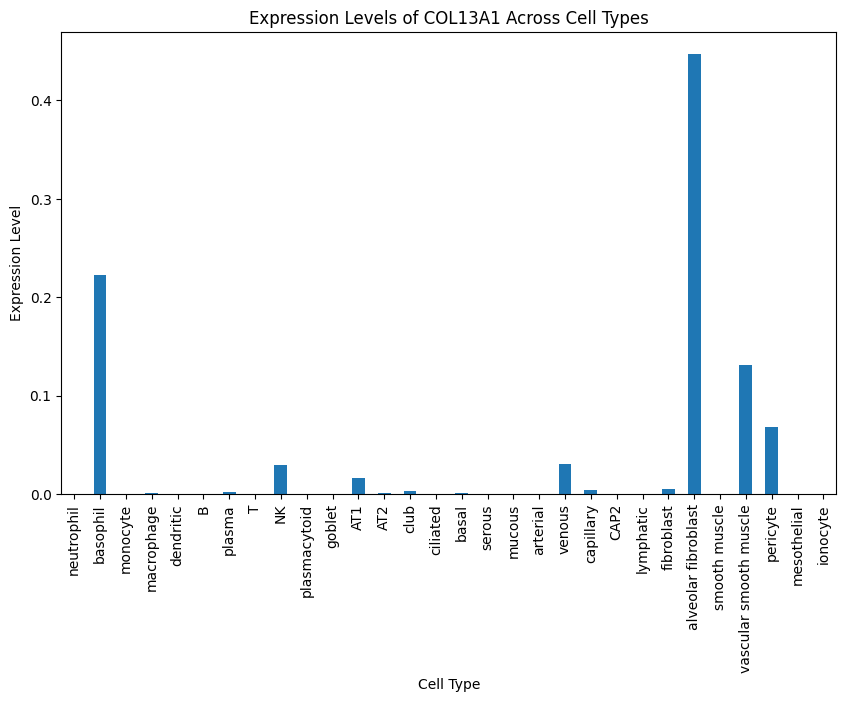

In [29]:
import matplotlib.pyplot as plt

avg_gene_expr = api.average(
    organism = "h_sapiens", 
    organ = "lung", 
    features = ["COL13A1"], 
    measurement_type = 'gene_expression'
)

# Transpose the DataFrame to have cell types as the index and genes as columns
avg_gene_expr_transposed = avg_gene_expr.T

# Plotting the expression levels for each gene
for gene in avg_gene_expr_transposed.columns:
    avg_gene_expr_transposed[gene].plot(kind='bar', figsize=(10, 6), legend=False)
    
    # Add labels and title
    plt.xlabel('Cell Type')
    plt.ylabel('Expression Level')
    plt.title(f'Expression Levels of {gene} Across Cell Types')
    
    # Show the plot
    plt.show()

### **Output**
This code gives a *bar chart* where:
* The x-axis represents different cell types.
* The y-axis represents gene expression level.(measured in counts per ten thousand, or cptt)



## **Conclusion**



This tutorial provide the some basic usage of `average` in *atlasapprox*. Thank you for using *atlasapprox* API, for more detailed information, please refer to the [official documentation](https://atlasapprox.readthedocs.io/en/latest/python/index.html).